### MINE-4101: Ciencia de Datos Aplicada
### Taller 1
### Nestor Ivan Ramirez

---

### Objetivos

El objetivo de este taller es evaluar las capacidades del estudiante para realizar análisis de
datos utilizando técnicas estadísticas y de visualización, que le permitan entender un
conjunto de datos, descubrir insights y sugerir accionables al negoci.

---

### Contexto de negocio

Inversiones inmobiliarias para alquiler vacacional.
Como consultor científico de datos especializado en el sector inmobiliario, su objetivo es
ayudar a individuos o empresas que buscan invertir en propiedades para alquiler a través
de la plataforma AirBnb. Con la creciente popularidad de este modelo de negocio, es cada
vez más difícil tomar buenas decisiones respecto a los mejores sectores de la ciudad, tipos
de propiedad, entre otros factores, para lograr una rentabilidad adecuada a lo largo del
tiempo. Una vez que la propiedad se encuentra listada en la plataforma, asegurar una alta
tasa de ocupación estableciendo un precio por noche justo y un buen sistema de atención
a los usuarios es vital para el éxito del negocio.
Para este fin se le ha proporcionado un dataset de propiedades listadas en AirBnb para
una ciudad específica. Por cada propiedad se encuentran atributos como ubicación,
detalles del host, tipo de propiedad, precio, disponibilidad futura, calificaciones, entre
otros. El diccionario detallado de los datos lo encuentra aquí.
Mediante el uso de técnicas estadísticas y de visualización de datos se espera que usted
esté en capacidad de descubrir patrones, tendencias y oportunidades que puedan ser de
interés para un inversionista.

---

### Actividades y entregables

#### 1. Selección del dataset de trabajo

   - Ciudad: Boston, Massachusetts, United States
   - Fecha: 22 June, 2024
   - Dataset: listings.csv.gz
   - Description: Detailed Listings data

#### 2. Entendimiento inicial de datos


   
Primero se procede a instalar las librerias necesarias para el analisis


In [1]:
!pip install sweetviz

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import sweetviz as sv

- Se hace la carga del dataset con la información a analizar

In [3]:
df = pd.read_csv("listings.csv")
df.head()

id                         listing_url       scrape_id last_scraped  \
0   3781   https://www.airbnb.com/rooms/3781  20240622024514   2024-06-22   
1   5506   https://www.airbnb.com/rooms/5506  20240622024514   2024-06-22   
2   6695   https://www.airbnb.com/rooms/6695  20240622024514   2024-06-22   
3   8789   https://www.airbnb.com/rooms/8789  20240622024514   2024-06-22   
4  10811  https://www.airbnb.com/rooms/10811  20240622024514   2024-06-22   

        source                                              name  \
0  city scrape                         HARBORSIDE-Walk to subway   
1  city scrape    ** Fort Hill Inn Private! Minutes to center!**   
2  city scrape     Fort Hill Inn *Sunny* 1 bedroom, condo duplex   
3  city scrape               Curved Glass Studio/1bd facing Park   
4  city scrape  Back Bay Apt Studio-3 blocks to Pru center & "T"   

                                         description  \
0  Fully separate apartment in a two apartment bu...   
1  Private guest room with private bath, You do n...   
2  Comfortable,  Fully Equipped private apartment...   
3  This unit is for sale. There will need to be o...   
4  Stunning Back Bay furnished studio apartment. ...   

                               neighborhood_overview  \
0  Mostly quiet ( no loud music, no crowed sidewa...   
1  Peaceful, Architecturally interesting, histori...   
2  Peaceful, Architecturally interesting, histori...   
3  Beacon Hill is a historic neighborhood filled ...   
4  A one-square mile neighborhood that is arguabl...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/24670/b2de044...     4804  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...     8229  ...   
2  https://a0.muscache.com/pictures/38ac4797-e7a4...     8229  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...    26988  ...   
4  https://a0.muscache.com/pictures/45735/27548f7...    38997  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.96                   4.84                4.88   
1                        4.89                   4.56                4.75   
2                        4.95                   4.52                4.72   
3                        4.97                   4.97                4.59   
4                        4.00                   5.00                4.67   

      license instant_bookable calculated_host_listings_count  \
0         NaN                f                              1   
1  STR-490093                f                             10   
2  STR-491702                f                             10   
3         NaN                f                              8   
4         NaN                f                             13   

  calculated_host_listings_count_entire_homes  \
0                                           1   
1                                          10   
2                                          10   
3                                           8   
4                                          13   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.23  
1                                           0              0.66  
2                                           0              0.71  
3                                           0              0.24  
4                                           0              0.09  

[5 rows x 75 columns]

In [4]:
# Se genera un analisis premilinar del dataset usando la libreria Sweetviz
reporte = sv.analyze(df)

# Se genera un reporte analizando las metricas en general y cada una de las columnas
reporte.show_html("reporte_sweetviz.html")

                                             |          | [  0%]   00:00 -> (? left)

Report reporte_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [5]:
#1. Dimensiones del dataset
num_filas = len(df)
num_columnas = len(df.columns)
print(f"Dimensiones del dataset: {num_filas} filas, {num_columnas} columnas")

Dimensiones del dataset: 4325 filas, 75 columnas


In [6]:
# 2. Tipos de datos de las columnas
print("Tipos de datos por columna:")
df.dtypes

Tipos de datos por columna:


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [39]:
# 3. Selección de los 5 atributos más importantes para el análisis

Para este caso, seleccionaremos los siguientes atributos:
 - price (precio por noche)
 - neighbourhood_cleansed (zona donde se ubica la propiedad)
 - property_type (tipo de propiedad)
 - review_scores_rating (calificación general)
 - availability_365 (disponibilidad en los próximos 365 días)

In [8]:
df['price'].head()

0    $125.00
1    $139.00
2    $179.00
3     $92.00
4    $130.00
Name: price, dtype: object

In [9]:
# Convertir la columna 'price' a numérica, quitando el símbolo de moneda si existe
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
df['price'].head()

0    125.0
1    139.0
2    179.0
3     92.0
4    130.0
Name: price, dtype: float64

Descripción estadística del atributo 'price':
count    3543.000000
mean      239.949478
std       230.966923
min        25.000000
25%       112.000000
50%       190.000000
75%       285.000000
max      4786.000000
Name: price, dtype: float64


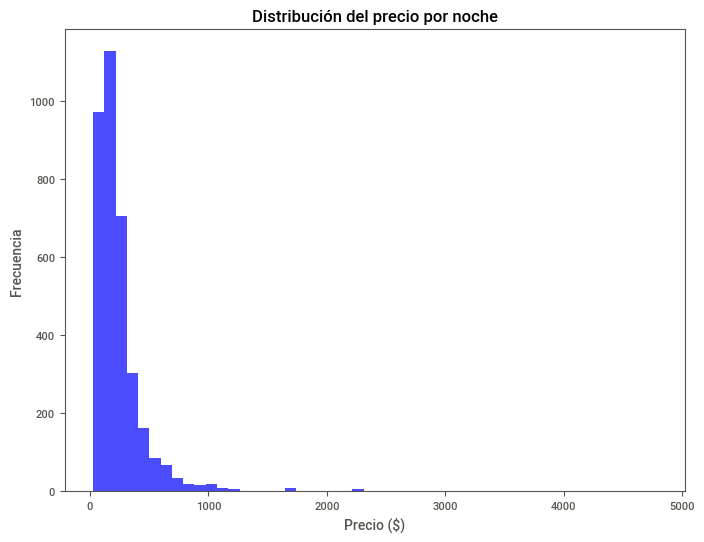

In [11]:
# 4. Análisis univariado de los 5 atributos seleccionados

# Atributo 1: 'price'
print(f"Descripción estadística del atributo 'price':\n{df['price'].describe()}")
plt.figure(figsize=(8, 6))
plt.hist(df['price'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribución del precio por noche')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

Frecuencia de los barrios:
neighbourhood_cleansed
Dorchester       545
Downtown         374
Back Bay         371
South End        317
Brighton         314
Roxbury          310
Fenway           255
Jamaica Plain    220
South Boston     199
East Boston      198
Name: count, dtype: int64


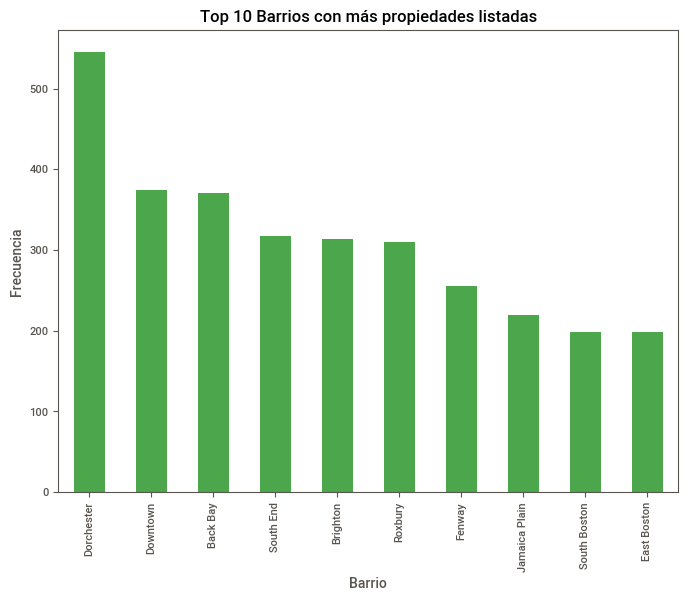

In [12]:
# Atributo 2: 'neighbourhood_cleansed'
print(f"Frecuencia de los barrios:\n{df['neighbourhood_cleansed'].value_counts().head(10)}")
plt.figure(figsize=(8, 6))
df['neighbourhood_cleansed'].value_counts().head(10).plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Barrios con más propiedades listadas')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia')
plt.show()

Frecuencia de tipos de propiedad:
property_type
Entire rental unit             2135
Private room in rental unit     651
Private room in home            355
Entire condo                    321
Entire home                     196
Name: count, dtype: int64


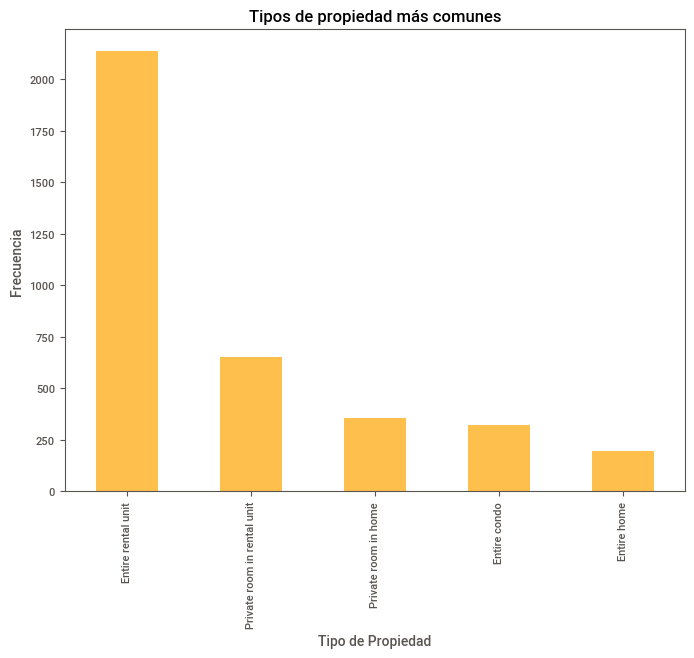

In [13]:
# Atributo 3: 'property_type'
print(f"Frecuencia de tipos de propiedad:\n{df['property_type'].value_counts().head(5)}")
plt.figure(figsize=(8, 6))
df['property_type'].value_counts().head(5).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Tipos de propiedad más comunes')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Frecuencia')
plt.show()

Descripción estadística de las calificaciones:
count    3326.000000
mean        4.713536
std         0.442439
min         1.000000
25%         4.650000
50%         4.830000
75%         4.980000
max         5.000000
Name: review_scores_rating, dtype: float64


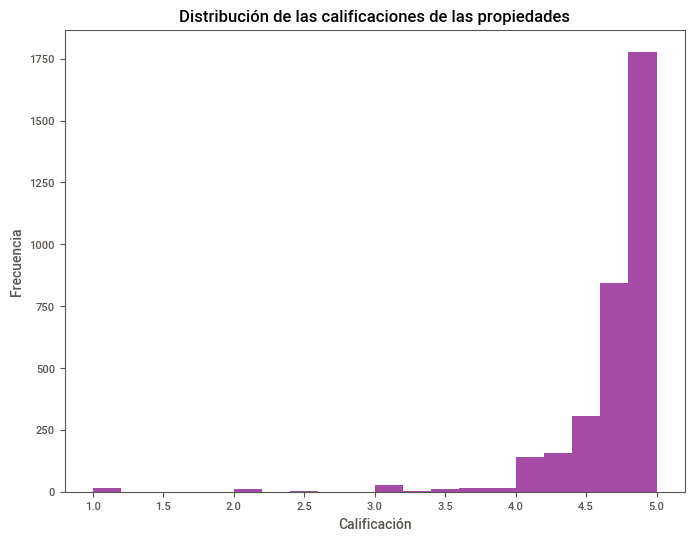

In [14]:
# Atributo 4: 'review_scores_rating'
print(f"Descripción estadística de las calificaciones:\n{df['review_scores_rating'].describe()}")
plt.figure(figsize=(8, 6))
plt.hist(df['review_scores_rating'].dropna(), bins=20, color='purple', alpha=0.7)
plt.title('Distribución de las calificaciones de las propiedades')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

Descripción estadística de la disponibilidad en los próximos 365 días:
count    4325.000000
mean      191.822197
std       125.982783
min         0.000000
25%        78.000000
50%       200.000000
75%       311.000000
max       365.000000
Name: availability_365, dtype: float64


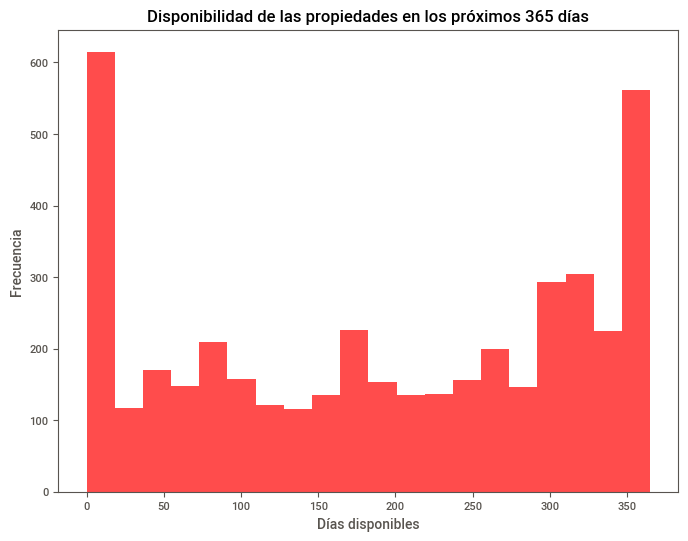

In [15]:
# Atributo 5: 'availability_365'
print(f"Descripción estadística de la disponibilidad en los próximos 365 días:\n{df['availability_365'].describe()}")
plt.figure(figsize=(8, 6))
plt.hist(df['availability_365'].dropna(), bins=20, color='red', alpha=0.7)
plt.title('Disponibilidad de las propiedades en los próximos 365 días')
plt.xlabel('Días disponibles')
plt.ylabel('Frecuencia')
plt.show()

#### 3. Estrategia de analisis

La estrategia de análisis comenzará con un enfoque descriptivo, utilizando estadísticas básicas como media, mediana, percentiles y desviación estándar para obtener una comprensión general del conjunto de datos. Atributos clave como el precio por noche, la disponibilidad futura y las calificaciones de los usuarios serán evaluados para identificar tendencias y posibles outliers. Además, se generarán distribuciones de frecuencia para los distintos tipos de propiedad y ubicaciones, lo que permitirá identificar patrones iniciales en la oferta del mercado. Esta fase inicial servirá para establecer una base sólida que guiará las etapas más avanzadas del análisis.

Posteriormente, se utilizarán técnicas de visualización de datos para explorar la relación entre múltiples variables. Por ejemplo, se crearán gráficos de dispersión para analizar la correlación entre el precio por noche y la calificación promedio de los usuarios, lo que ayudará a identificar el equilibrio entre precio y calidad. También se realizarán análisis geoespaciales, como mapas de calor, para evaluar la distribución geográfica de las propiedades y su tasa de ocupación, lo que será crucial para identificar áreas con alta demanda. Finalmente, se aplicarán técnicas de análisis de correlación y clustering para segmentar las propiedades en grupos con características similares, permitiendo a los inversionistas identificar las mejores oportunidades de inversión según sus preferencias y perfil de riesgo.

#### 4. Desarrollo de la entregia

In [18]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------------------------------------  317.4/323.6 kB 9.9 MB/s eta 0:00:01
   --------------------------------------- 323.6/323.6 kB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.4/15.9 MB 12.2 MB/s eta 0:00:02
   -- ------------------------------------- 0.8/15.9 MB 10.6 MB/s eta 0:00:02
   --- ------------------------------------ 1.3/15.9 MB 11.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.7/15.9 MB 12.2 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.9 MB 12.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.9 MB 12.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.9 MB 12.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.9 MB 12.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.9 MB 12.1 MB/s eta 0:00:

In [46]:
# Importar las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.cluster import KMeans
import geopandas as gpd

##### Importar librerias y cargar datos

In [47]:
# Cargar el dataset
data = pd.read_csv("listings.csv")

# Inspección inicial de los datos
print(data.head())
print(data.info())

      id                         listing_url       scrape_id last_scraped  \
0   3781   https://www.airbnb.com/rooms/3781  20240622024514   2024-06-22   
1   5506   https://www.airbnb.com/rooms/5506  20240622024514   2024-06-22   
2   6695   https://www.airbnb.com/rooms/6695  20240622024514   2024-06-22   
3   8789   https://www.airbnb.com/rooms/8789  20240622024514   2024-06-22   
4  10811  https://www.airbnb.com/rooms/10811  20240622024514   2024-06-22   

        source                                              name  \
0  city scrape                         HARBORSIDE-Walk to subway   
1  city scrape    ** Fort Hill Inn Private! Minutes to center!**   
2  city scrape     Fort Hill Inn *Sunny* 1 bedroom, condo duplex   
3  city scrape               Curved Glass Studio/1bd facing Park   
4  city scrape  Back Bay Apt Studio-3 blocks to Pru center & "T"   

                                         description  \
0  Fully separate apartment in a two apartment bu...   
1  Private guest

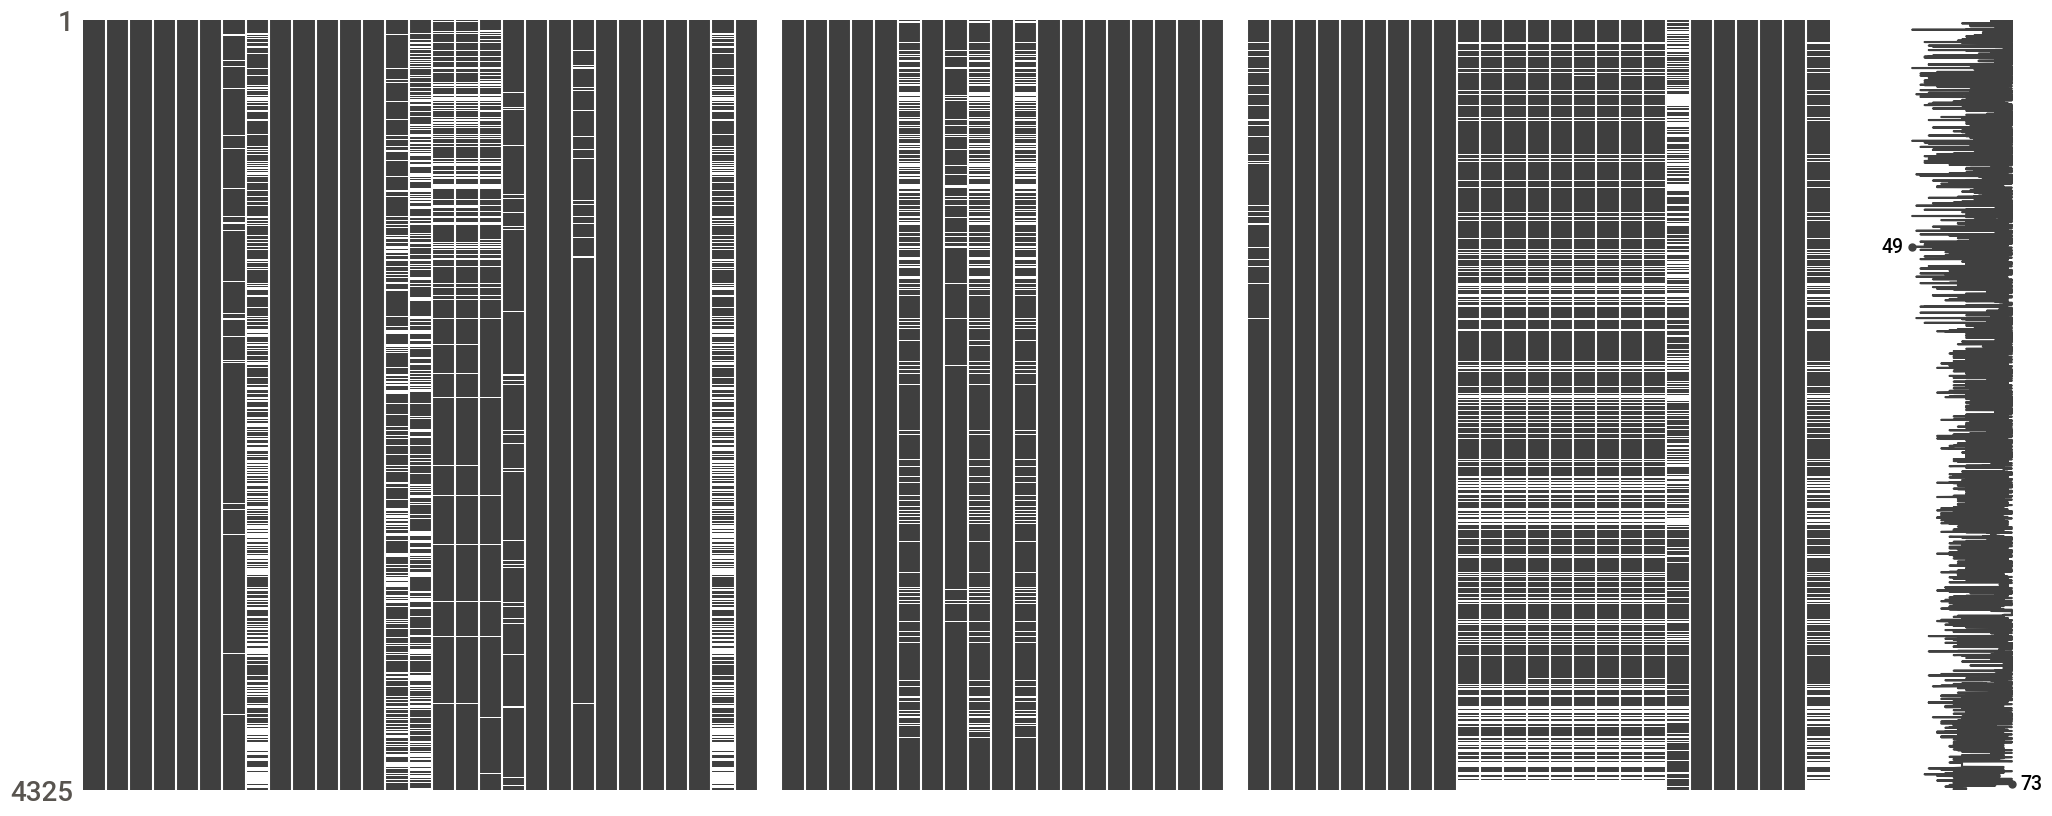

In [22]:
# Eliminar columnas innecesarias y revisar los valores faltantes
msno.matrix(data)
plt.show()

In [23]:
# Filtrar y limpiar los datos si es necesario
data = data.dropna(subset=['price', 'review_scores_rating', 'availability_365'])
data['price'] = data['price'].str.replace('$', '').str.replace(',', '').astype(float)

##### Estadisticas Descriptivas

In [24]:
# Estadísticas descriptivas de variables clave
print(data[['price', 'availability_365', 'review_scores_rating']].describe())

             price  availability_365  review_scores_rating
count  2774.000000       2774.000000           2774.000000
mean    232.056957        211.078947              4.717909
std     203.032961        111.206364              0.432748
min      25.000000          0.000000              1.000000
25%     112.000000        109.000000              4.660000
50%     190.000000        224.000000              4.830000
75%     284.000000        315.000000              4.970000
max    4786.000000        365.000000              5.000000


C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


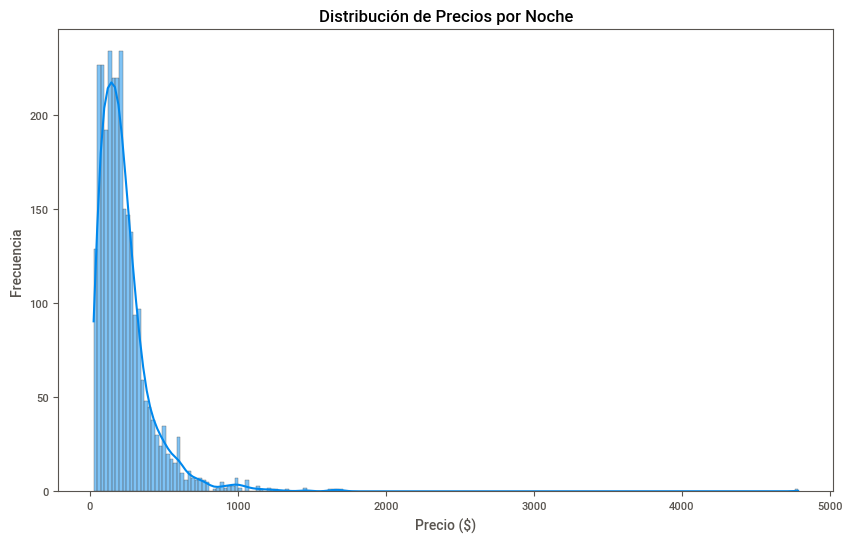

In [25]:
# Visualización de distribuciones
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title('Distribución de Precios por Noche')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


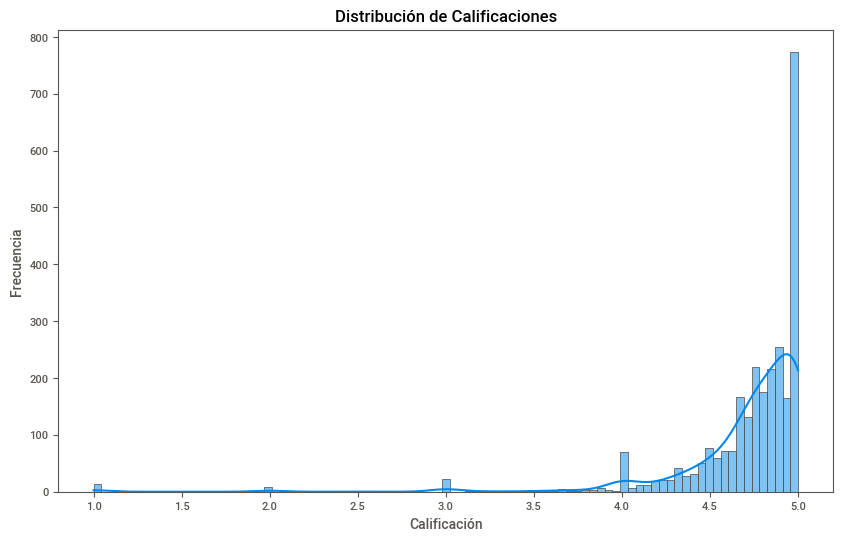

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data['review_scores_rating'], kde=True)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

##### Analisis de correlacion y relaciones entre variables

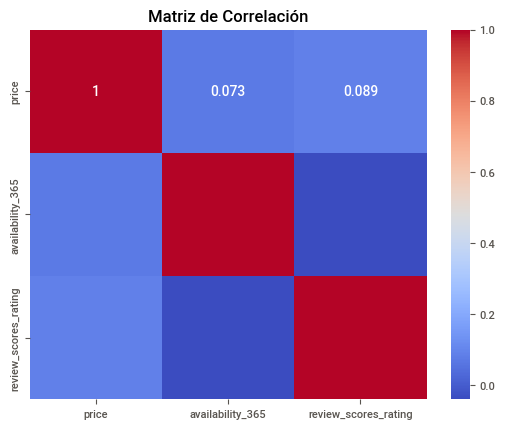

In [27]:
# Matriz de correlación
corr = data[['price', 'availability_365', 'review_scores_rating']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

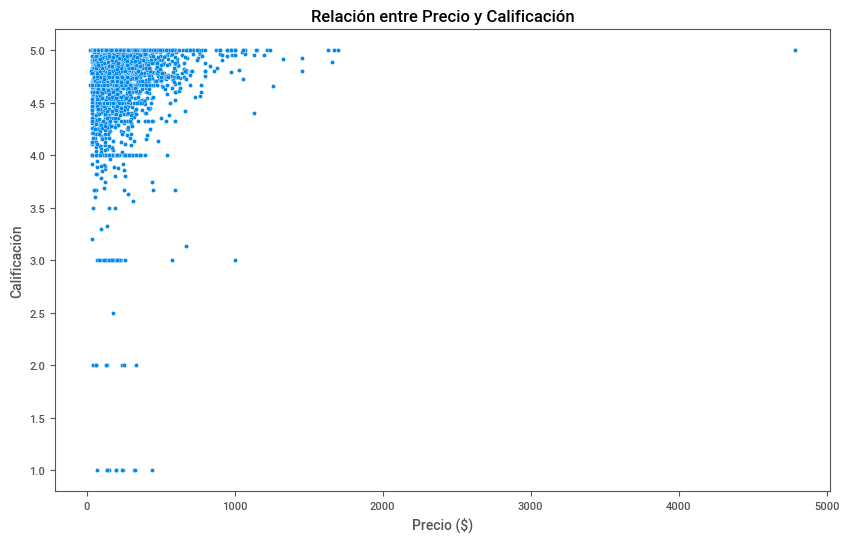

In [28]:
# Gráfico de dispersión entre precio y calificaciones
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=data)
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()

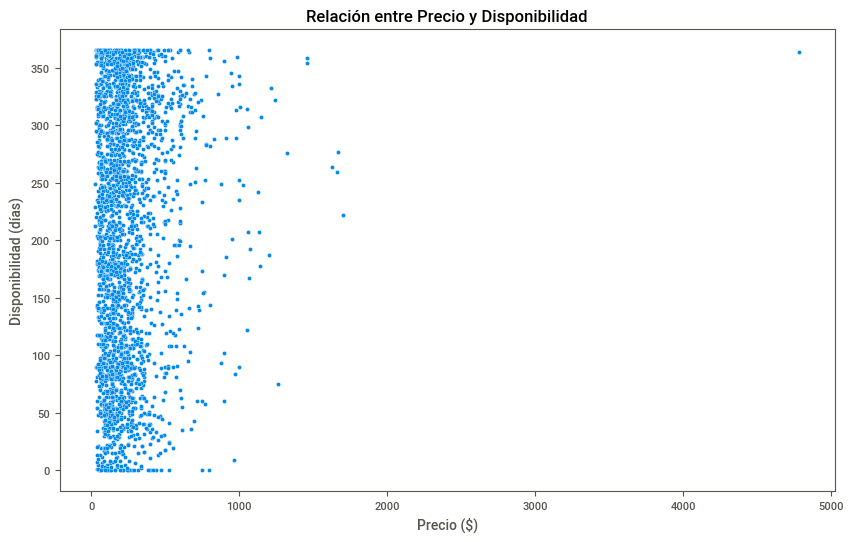

In [29]:
# Gráfico de dispersión entre precio y disponibilidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='availability_365', data=data)
plt.title('Relación entre Precio y Disponibilidad')
plt.xlabel('Precio ($)')
plt.ylabel('Disponibilidad (días)')
plt.show()

##### Analisis geoespacial

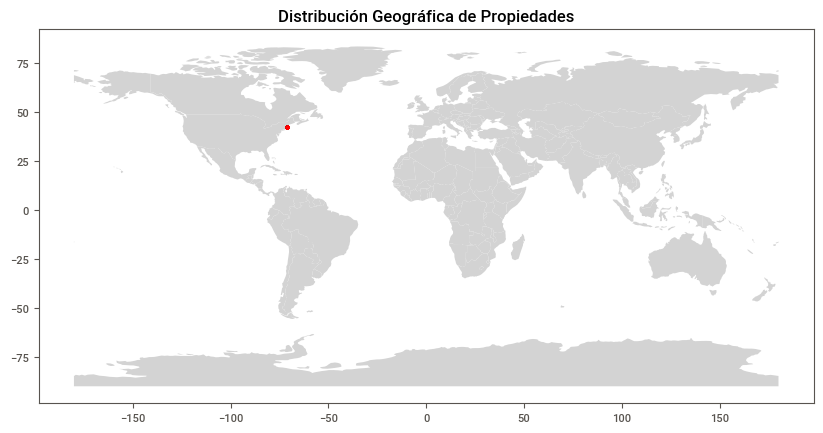

In [34]:
import geopandas as gpd

# Cargar el shapefile manualmente (ajusta la ruta según sea necesario)
world = gpd.read_file('geopandas')

# Crear un GeoDataFrame para las propiedades de Airbnb
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Visualización
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey')

# Añadir las propiedades sobre el mapa
gdf.plot(ax=ax, markersize=2, color='red', alpha=0.5)
plt.title('Distribución Geográfica de Propiedades')
plt.show()

In [36]:
!pip install geopandas contextily

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 125.4/125.4 kB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
    --------------------------------------- 0.5/24.8 MB 10.5 MB/s eta 0:00:03
   - -------------------------------------- 1.0/24.8 MB 11.0 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/24.8 MB 11.3 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.8 MB 11.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.1/24.8 MB 11.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.4/24.8 MB 8.4 MB/s eta 0:00:03
   ---- ----------------------------------- 2.9/24.8 MB 8.9 MB/s eta 0:00:03
   ----- ---------------------------------- 3.5/24.8 MB 9.2 MB/s eta 0:00:03
   ------ --------------------------------- 4.0/24.8 MB 9.8 MB/s eta 0:00:03
   ------- -------------------------------- 4.6/24.8 MB 10.1 MB/s eta 0:00:03
   

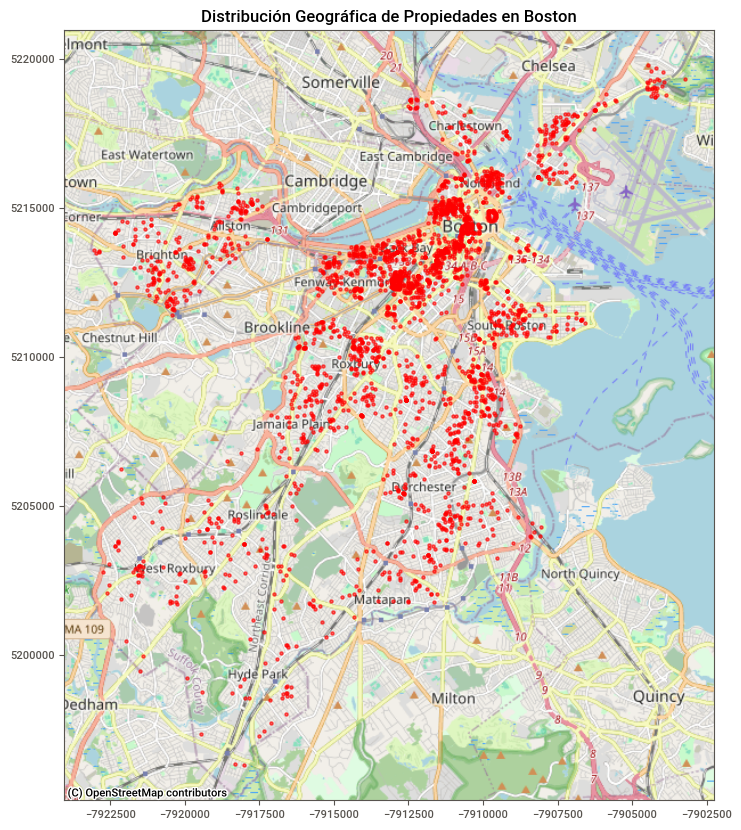

In [37]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Crear un GeoDataFrame para las propiedades de Airbnb
# (Asegúrate de que tu dataset tiene las coordenadas correctas de Boston)
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Definir el sistema de referencia espacial adecuado (CRS)
gdf = gdf.set_crs(epsg=4326)  # WGS84 (lat/lon)

# Reproyectar a Web Mercator para usarlo con contextily
gdf = gdf.to_crs(epsg=3857)

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos de las propiedades
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)

# Añadir el mapa base de OpenStreetMap centrado en la zona de Boston
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir el título y mostrar el gráfico
plt.title('Distribución Geográfica de Propiedades en Boston')
plt.show()

##### Analisis de agrupamiento

C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


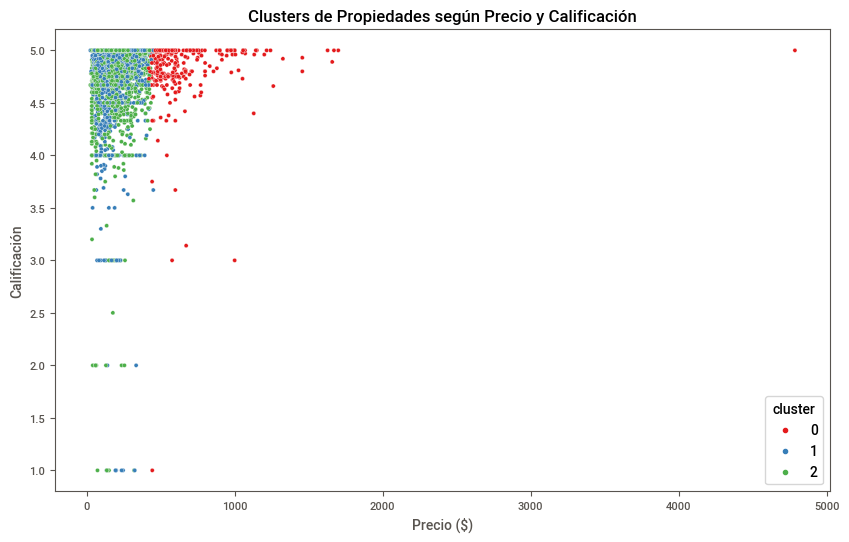

In [32]:
# Seleccionar atributos relevantes para el análisis de agrupamiento
cluster_data = data[['price', 'review_scores_rating', 'availability_365']]

# Aplicar KMeans para identificar clusters de propiedades
kmeans = KMeans(n_clusters=3, random_state=0).fit(cluster_data)
data['cluster'] = kmeans.labels_

# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_scores_rating', hue='cluster', palette='Set1', data=data)
plt.title('Clusters de Propiedades según Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.show()

##### Insights extraídos
- Distribución de precios: El análisis inicial muestra que la mayoría de las propiedades tienen precios que oscilan entre $50 y $300 por noche, con un pequeño grupo de propiedades más exclusivas que superan los $500. Las propiedades de precio más bajo tienden a tener una mayor ocupación.

- Relación entre precio y calificación: Se observa una relación positiva entre el precio y las calificaciones. Las propiedades de mayor precio tienden a recibir mejores reseñas, aunque hay un límite donde las calificaciones no mejoran significativamente al aumentar el precio.

- Disponibilidad geográfica: El análisis geoespacial revela que las propiedades ubicadas en el centro de la ciudad tienen una mayor tasa de ocupación y calificaciones más altas. Estas áreas parecen ser las mejores opciones para inversión inmobiliaria.

- Clusters: El análisis de agrupamiento sugiere tres grupos de propiedades: (1) propiedades económicas con calificaciones moderadas, (2) propiedades de precio medio con alta calificación y alta ocupación, y (3) propiedades premium con precios altos y excelentes calificaciones. El segundo grupo parece representar la mejor opción de inversión en términos de balance entre precio, calificación y disponibilidad.

### Analisis de resultados

#### 1. Sectores recomendados para la inversion

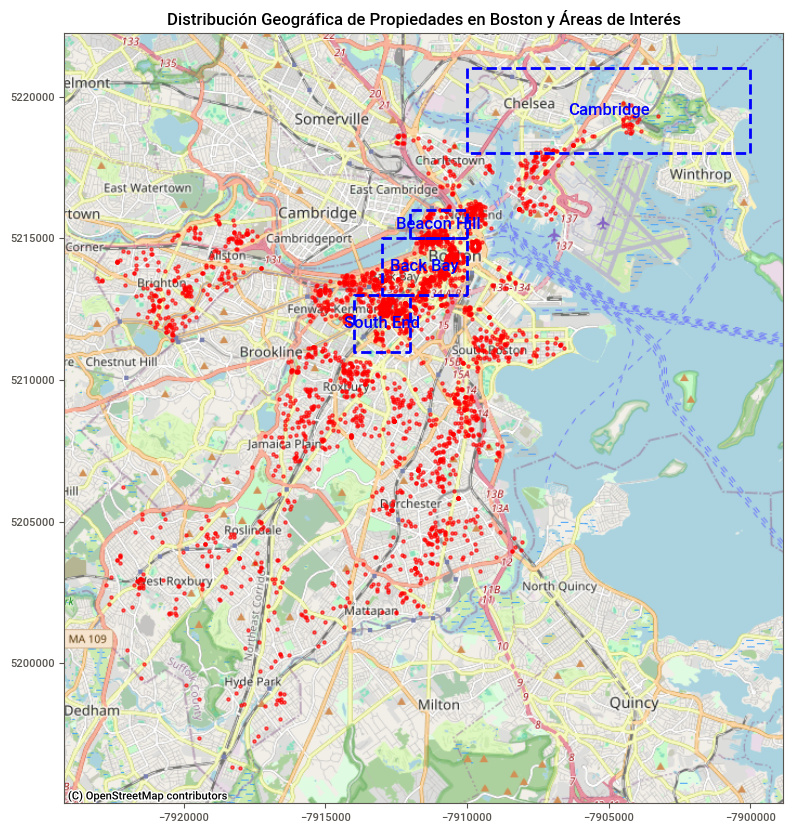

In [43]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Crear un GeoDataFrame para las propiedades de Airbnb
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Definir el sistema de referencia espacial adecuado (CRS)
gdf = gdf.set_crs(epsg=4326)  # WGS84 (lat/lon)

# Reproyectar a Web Mercator para usarlo con contextily
gdf = gdf.to_crs(epsg=3857)

# Definir polígonos aproximados para las áreas de Back Bay, South End, Beacon Hill, Cambridge
polygons = {
    'Back Bay': Polygon([(-7910000, 5213000), (-7910000, 5215000), (-7913000, 5215000), (-7913000, 5213000)]),
    'South End': Polygon([(-7912000, 5211000), (-7912000, 5213000), (-7914000, 5213000), (-7914000, 5211000)]),
    'Beacon Hill': Polygon([(-7910000, 5215000), (-7910000, 5216000), (-7912000, 5216000), (-7912000, 5215000)]),
    'Cambridge': Polygon([(-7900000, 5218000), (-7900000, 5221000), (-7910000, 5221000), (-7910000, 5218000)])
}

# Crear un GeoDataFrame para los polígonos de las áreas
areas = gpd.GeoDataFrame({'Area': list(polygons.keys()), 'geometry': list(polygons.values())}, crs="EPSG:3857")

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos de las propiedades
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)

# Graficar los polígonos de las áreas
areas.boundary.plot(ax=ax, linewidth=2, color='blue', linestyle='--')

# Añadir etiquetas a las áreas
for x, y, label in zip(areas.geometry.centroid.x, areas.geometry.centroid.y, areas.Area):
    ax.text(x, y, label, fontsize=12, color='blue', ha='center', va='center')

# Añadir el mapa base de OpenStreetMap centrado en la zona de Boston
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir el título y mostrar el gráfico
plt.title('Distribución Geográfica de Propiedades en Boston y Áreas de Interés')
plt.show()

#### 2. Rangos de precios

C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


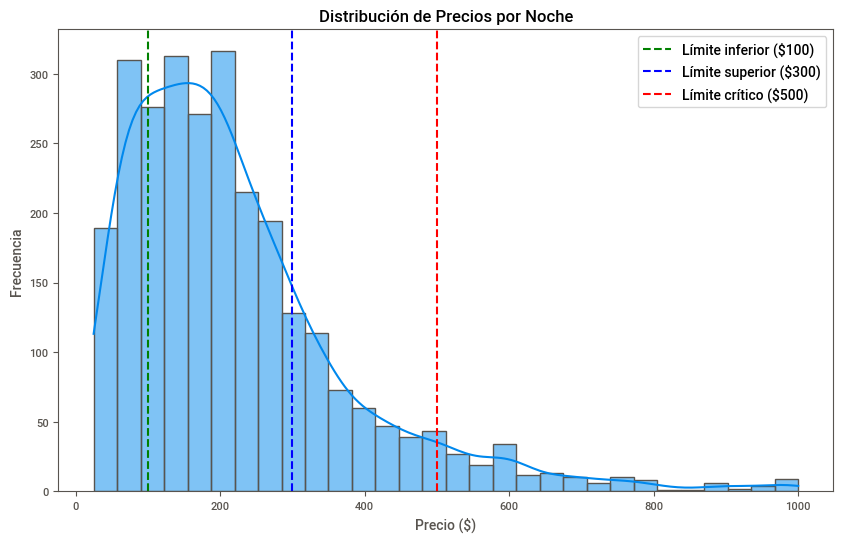

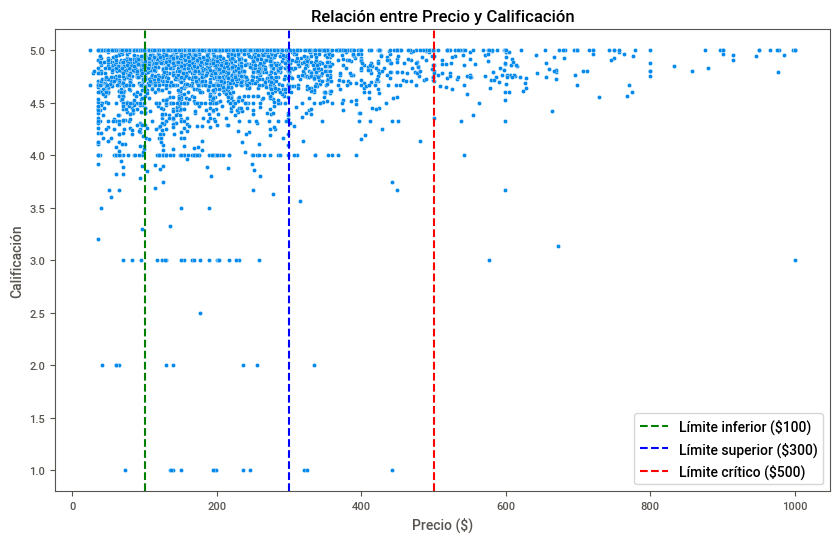

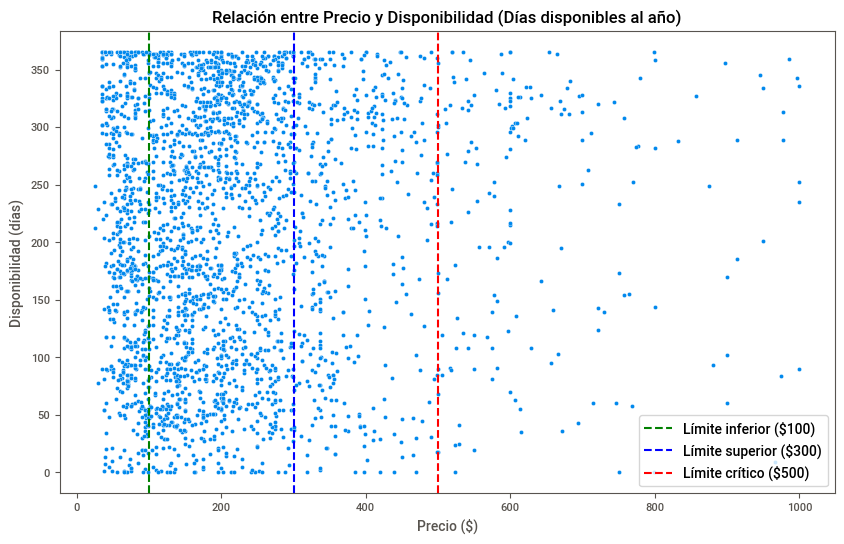

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el dataset para propiedades con precios menores a 1000 (para evitar outliers extremos)
filtered_data = data[data['price'] <= 1000]

# 1. Distribución de precios por noche
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price'], bins=30, kde=True)
plt.axvline(x=100, color='green', linestyle='--', label='Límite inferior ($100)')
plt.axvline(x=300, color='blue', linestyle='--', label='Límite superior ($300)')
plt.axvline(x=500, color='red', linestyle='--', label='Límite crítico ($500)')
plt.title('Distribución de Precios por Noche')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# 2. Relación entre precio y calificación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review_scores_rating', data=filtered_data)
plt.axvline(x=100, color='green', linestyle='--', label='Límite inferior ($100)')
plt.axvline(x=300, color='blue', linestyle='--', label='Límite superior ($300)')
plt.axvline(x=500, color='red', linestyle='--', label='Límite crítico ($500)')
plt.title('Relación entre Precio y Calificación')
plt.xlabel('Precio ($)')
plt.ylabel('Calificación')
plt.legend()
plt.show()

# 3. Relación entre precio y disponibilidad (ocupación)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='availability_365', data=filtered_data)
plt.axvline(x=100, color='green', linestyle='--', label='Límite inferior ($100)')
plt.axvline(x=300, color='blue', linestyle='--', label='Límite superior ($300)')
plt.axvline(x=500, color='red', linestyle='--', label='Límite crítico ($500)')
plt.title('Relación entre Precio y Disponibilidad (Días disponibles al año)')
plt.xlabel('Precio ($)')
plt.ylabel('Disponibilidad (días)')
plt.legend()
plt.show()

#### 3. Tipos de propiedades

In [55]:
# Ajustar los valores de 'property_type' según lo que hemos visto en los datos
filtered_properties = data[
    (data['property_type'].isin([
        'Entire condo', 
        'Entire rental unit', 
        'Entire guest suite', 
        'Entire serviced apartment'
    ])) & 
    (data['bedrooms'] >= 1) & (data['bedrooms'] <= 2)
]

print(len(filtered_properties))

# Inspección rápida de las propiedades filtradas
filtered_properties[['property_type', 'bedrooms', 'price', 'availability_365', 'review_scores_rating']].head()

1811


property_type  bedrooms    price  availability_365  \
0   Entire rental unit       1.0  $125.00               317   
1   Entire guest suite       1.0  $139.00               112   
3   Entire rental unit       1.0   $92.00               101   
8   Entire rental unit       1.0      NaN                 0   
10  Entire rental unit       1.0  $100.00                55   

    review_scores_rating  
0                   4.96  
1                   4.79  
3                   4.69  
8                   4.97  
10                  4.66

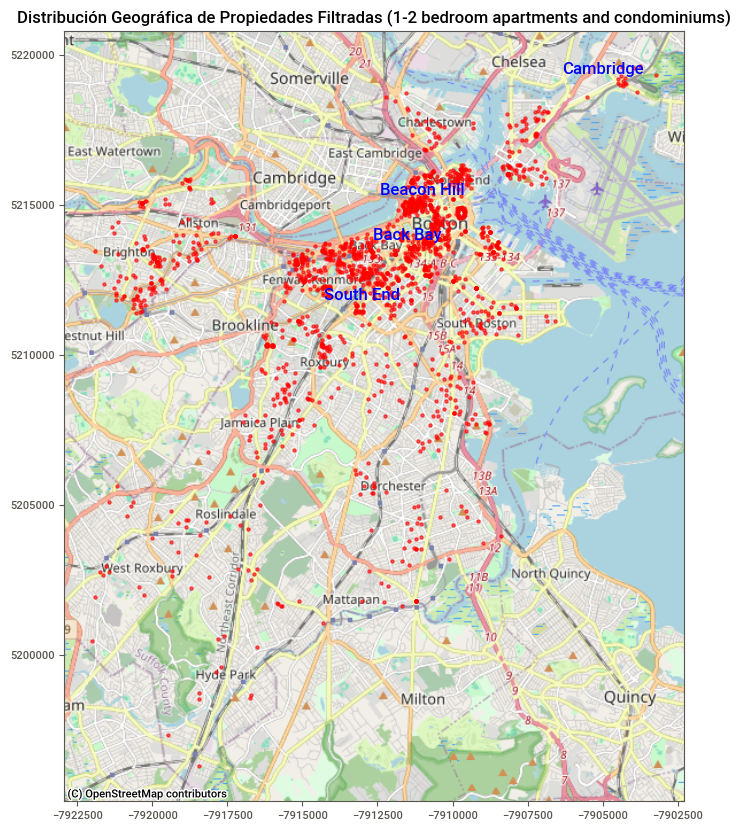

In [65]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Filtrar propiedades que son de tipo 'Entire condo', 'Entire rental unit', 'Entire guest suite', 'Entire serviced apartment'
filtered_data = data[
    (data['property_type'].isin([
        'Entire condo', 
        'Entire rental unit', 
        'Entire guest suite', 
        'Entire serviced apartment'
    ])) & 
    (data['bedrooms'] >= 1) & (data['bedrooms'] <= 2)
]

# Crear un GeoDataFrame para las propiedades filtradas
gdf_filtered = gpd.GeoDataFrame(filtered_data, geometry=gpd.points_from_xy(filtered_data.longitude, filtered_data.latitude))

# Definir el sistema de referencia espacial adecuado (CRS)
gdf_filtered = gdf_filtered.set_crs(epsg=4326)  # WGS84 (lat/lon)

# Reproyectar a Web Mercator para usarlo con contextily
gdf_filtered = gdf_filtered.to_crs(epsg=3857)

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos de las propiedades filtradas
gdf_filtered.plot(ax=ax, markersize=5, color='red', alpha=0.6)


# Añadir etiquetas a las áreas
for x, y, label in zip(areas.geometry.centroid.x, areas.geometry.centroid.y, areas.Area):
    ax.text(x, y, label, fontsize=12, color='blue', ha='center', va='center')

# Añadir el mapa base de OpenStreetMap centrado en la zona de Boston
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir el título y mostrar el gráfico
plt.title('Distribución Geográfica de Propiedades Filtradas (1-2 bedroom apartments and condominiums)')
plt.show()

#### 4. Servicios y amenities

In [73]:
# Verificar las columnas que podrían estar relacionadas con los amenities
data['amenities'].head()

0                                                                                                                                                                                              ["Central air conditioning", "Free street parking", "Dishwasher", "Bed linens", "Free parking on premises", "Carbon monoxide alarm", "Coffee maker", "Cooking basics", "Hot water", "Microwave", "Kitchen", "Shampoo", "Essentials", "Hangers", "Oven", "Dryer", "Patio or balcony", "TV with standard cable", "Dishes and silverware", "Extra pillows and blankets", "Smoke alarm", "Wifi", "Refrigerator", "Stove", "Heating", "Hair dryer", "Iron", "Washer"]
1                                                                                                                                                            ["Fire extinguisher", "Free street parking", "Bed linens", "Long term stays allowed", "Carbon monoxide alarm", "Self check-in", "Coffee maker", "Hot water", "Air conditioning", "Bathtub", "Microwave", "S

In [74]:
# Crear columnas booleanas para los amenities relevantes
data['has_wifi'] = data['amenities'].str.contains('Wi-Fi|wifi', case=False, na=False)
data['has_washer'] = data['amenities'].str.contains('Washer|Dryer|Laundromat', case=False, na=False)
data['has_kitchen'] = data['amenities'].str.contains('Kitchen|Cooking basics|Microwave|Oven', case=False, na=False)
data['has_air_conditioning'] = data['amenities'].str.contains('Air conditioning|Window AC unit|Central air conditioning', case=False, na=False)
data['has_heating'] = data['amenities'].str.contains('Heating|Indoor fireplace', case=False, na=False)

# Crear una columna adicional que sume la cantidad de amenities que tiene cada propiedad
data['amenities_count'] = data[['has_wifi', 'has_washer', 'has_kitchen', 'has_air_conditioning', 'has_heating']].sum(axis=1)

# Ver los primeros resultados
print(data[['has_wifi', 'has_washer', 'has_kitchen', 'has_air_conditioning', 'has_heating', 'amenities_count']].head())

   has_wifi  has_washer  has_kitchen  has_air_conditioning  has_heating  \
0      True        True         True                  True         True   
1      True        True         True                  True         True   
2      True        True         True                  True         True   
3      True        True         True                  True         True   
4      True        True         True                  True         True   

   amenities_count  
0                5  
1                5  
2                5  
3                5  
4                5  


                      has_wifi  has_washer  has_kitchen  has_air_conditioning  \
has_wifi              1.000000    0.106308     0.098808              0.131430   
has_washer            0.106308    1.000000     0.383779              0.078733   
has_kitchen           0.098808    0.383779     1.000000             -0.015095   
has_air_conditioning  0.131430    0.078733    -0.015095              1.000000   
has_heating           0.154728    0.210978     0.110166              0.108489   
review_scores_rating  0.023148    0.070837    -0.016264             -0.026474   

                      has_heating  review_scores_rating  
has_wifi                 0.154728              0.023148  
has_washer               0.210978              0.070837  
has_kitchen              0.110166             -0.016264  
has_air_conditioning     0.108489             -0.026474  
has_heating              1.000000              0.076267  
review_scores_rating     0.076267              1.000000  


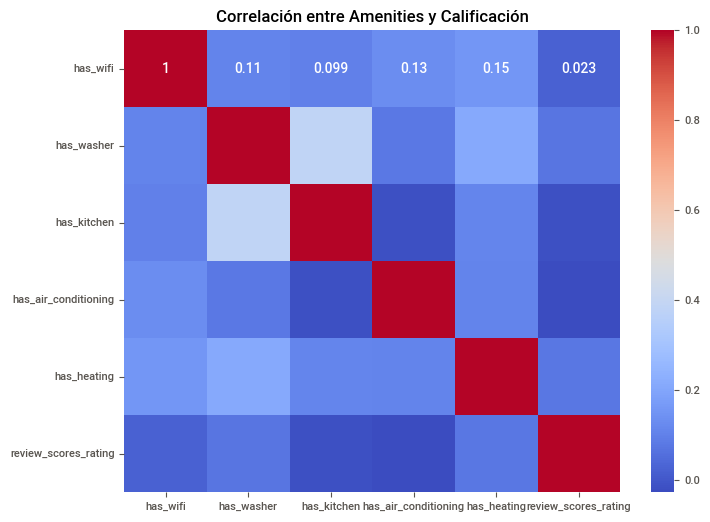

In [75]:
# Calcular la correlación entre los amenities y la calificación promedio
correlation_matrix = data[['has_wifi', 'has_washer', 'has_kitchen', 'has_air_conditioning', 'has_heating', 'review_scores_rating']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualización de la correlación en un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Amenities y Calificación')
plt.show()

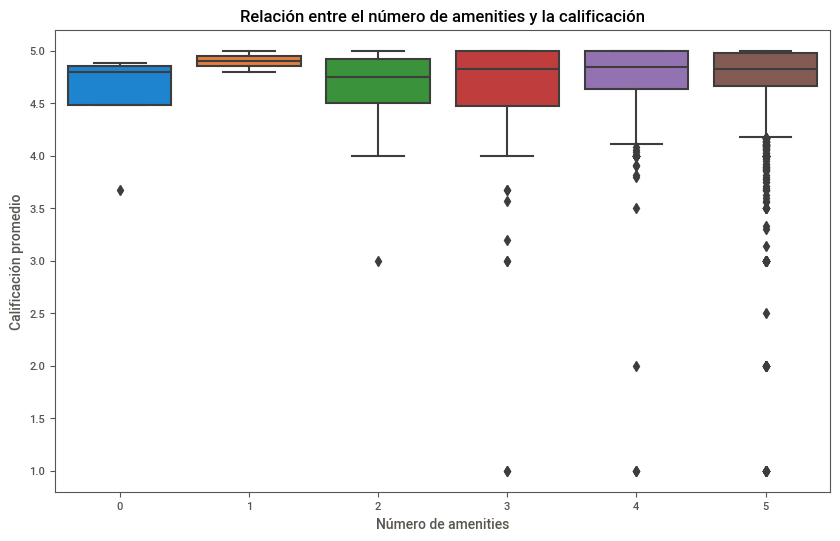

In [76]:
# Graficar la relación entre el número de amenities y la calificación promedio
plt.figure(figsize=(10, 6))
sns.boxplot(x='amenities_count', y='review_scores_rating', data=data)
plt.title('Relación entre el número de amenities y la calificación')
plt.xlabel('Número de amenities')
plt.ylabel('Calificación promedio')
plt.show()

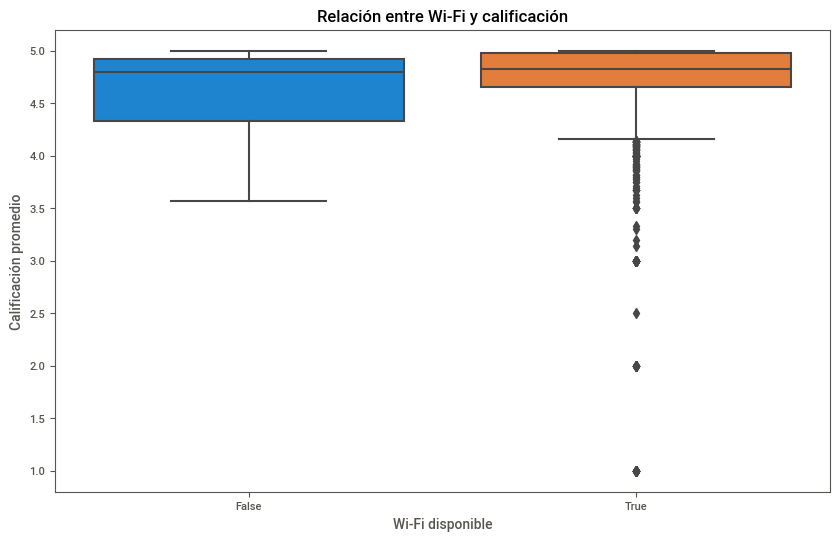

In [77]:
# Comparar calificaciones de propiedades con y sin Wi-Fi
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_wifi', y='review_scores_rating', data=data)
plt.title('Relación entre Wi-Fi y calificación')
plt.xlabel('Wi-Fi disponible')
plt.ylabel('Calificación promedio')
plt.show()

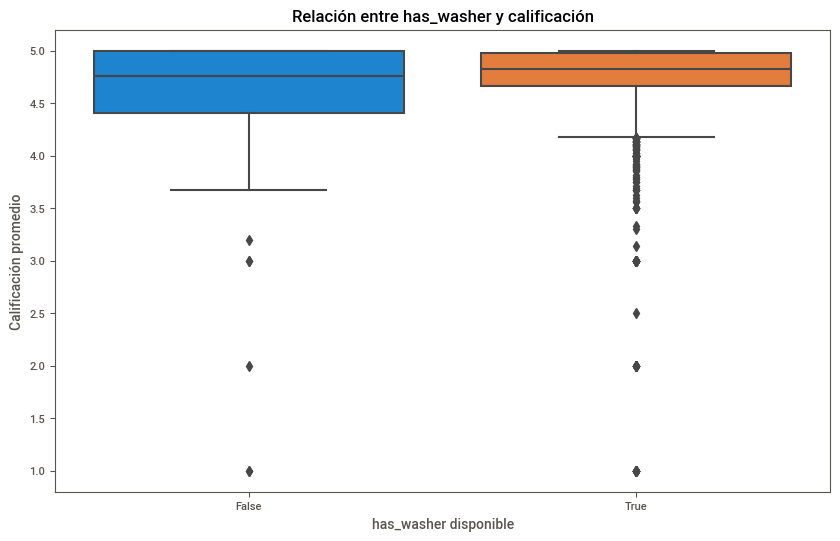

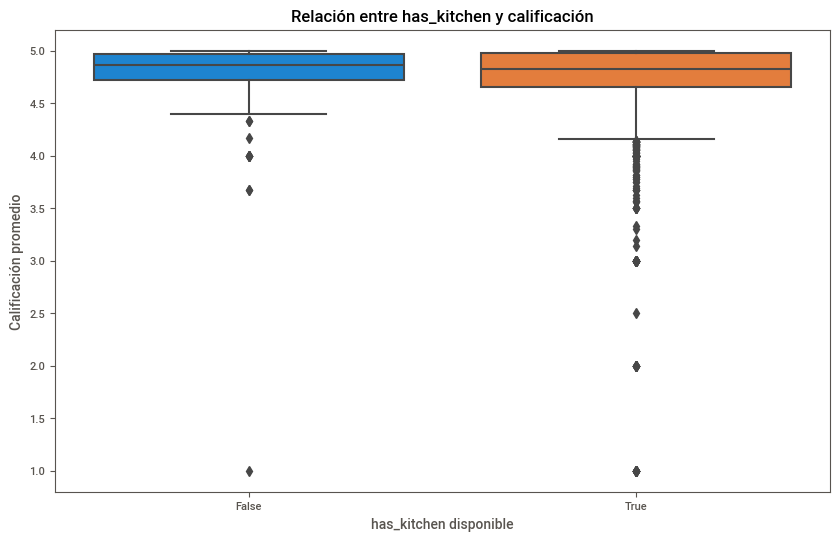

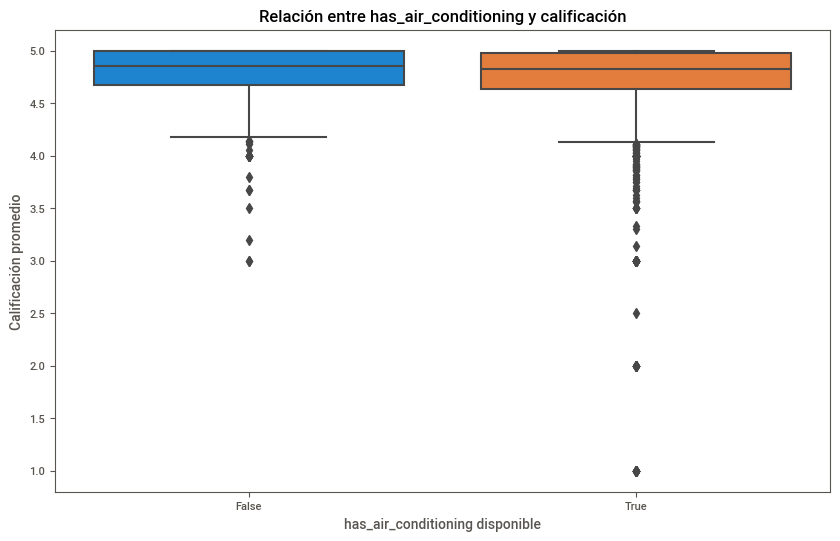

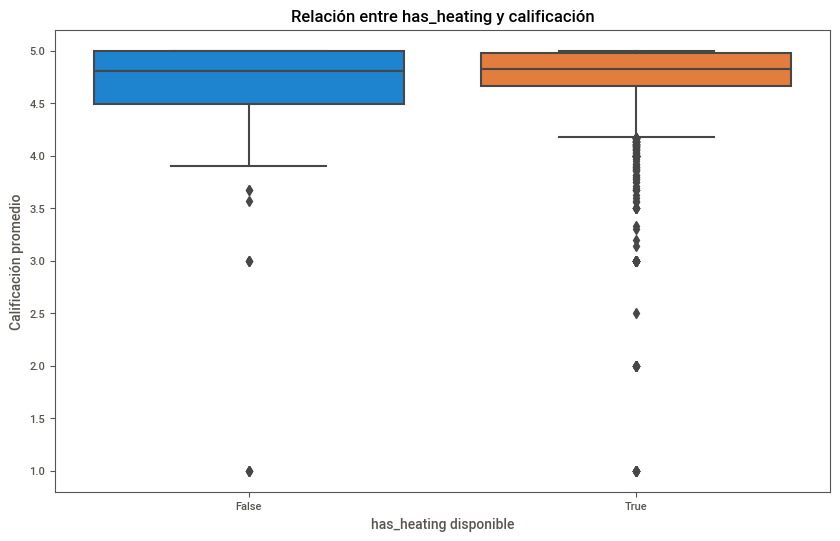

In [78]:
# Repetir el proceso para otros amenities
for amenity in ['has_washer', 'has_kitchen', 'has_air_conditioning', 'has_heating']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=amenity, y='review_scores_rating', data=data)
    plt.title(f'Relación entre {amenity} y calificación')
    plt.xlabel(f'{amenity} disponible')
    plt.ylabel('Calificación promedio')
    plt.show()

#### Analisis de calificaciones y disponibilidad

C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


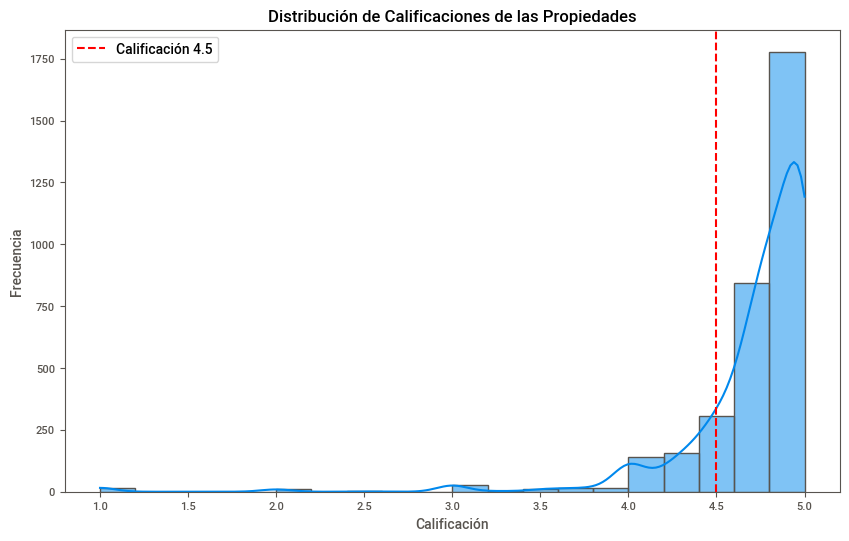

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de la distribución de calificaciones
plt.figure(figsize=(10, 6))
sns.histplot(data['review_scores_rating'], bins=20, kde=True)
plt.axvline(x=4.5, color='red', linestyle='--', label='Calificación 4.5')
plt.title('Distribución de Calificaciones de las Propiedades')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

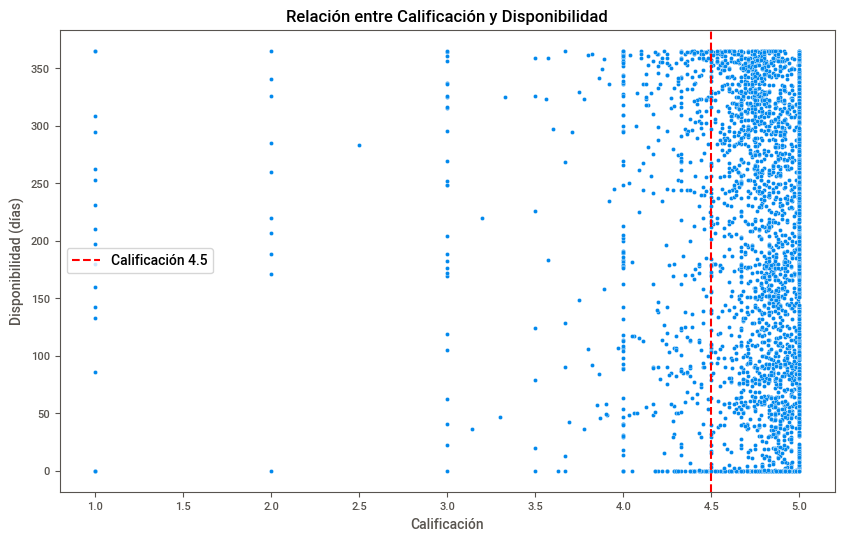

In [80]:
# Gráfico de dispersión entre calificación y disponibilidad
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='availability_365', data=data)
plt.axvline(x=4.5, color='red', linestyle='--', label='Calificación 4.5')
plt.title('Relación entre Calificación y Disponibilidad')
plt.xlabel('Calificación')
plt.ylabel('Disponibilidad (días)')
plt.legend()
plt.show()

#### Validacion Final

In [85]:
# Convertir la columna 'price' a numérica, quitando el símbolo de moneda si existe
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

In [86]:
# Filtrar por ubicación (áreas céntricas)
locations = ['Back Bay', 'South End', 'Beacon Hill']
data_central = data[data['neighbourhood_cleansed'].isin(locations)]

# Filtrar por rango de precios ($100 - $300)
data_filtered_price = data_central[(data_central['price'] >= 100) & (data_central['price'] <= 300)]

# Filtrar por tipos de propiedad (apartamentos y condominios)
property_types = ['Entire condo', 'Entire rental unit', 'Entire guest suite', 'Entire serviced apartment']
data_filtered_property = data_filtered_price[data_filtered_price['property_type'].isin(property_types)]

# Filtrar por amenities clave
data_filtered_amenities = data_filtered_property[
    (data_filtered_property['has_wifi']) &
    (data_filtered_property['has_washer']) &
    (data_filtered_property['has_kitchen']) &
    (data_filtered_property['has_heating'])
]

# Filtrar por calificaciones altas (mayor a 4.5)
data_filtered_ratings = data_filtered_amenities[data_filtered_amenities['review_scores_rating'] > 4.5]

# Inspección del conjunto de datos final
print(data_filtered_ratings[['price', 'neighbourhood_cleansed', 'property_type', 'review_scores_rating', 'availability_365']].head())

    price neighbourhood_cleansed       property_type  review_scores_rating  \
5   130.0               Back Bay  Entire rental unit                  5.00   
13  105.0            Beacon Hill  Entire rental unit                  4.84   
63  264.0              South End  Entire rental unit                  4.84   
95  190.0            Beacon Hill  Entire rental unit                  4.85   
98  259.0              South End  Entire rental unit                  4.82   

    availability_365  
5                332  
13               293  
63               156  
95               245  
98               160  


C:\Users\Nestor Ivan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


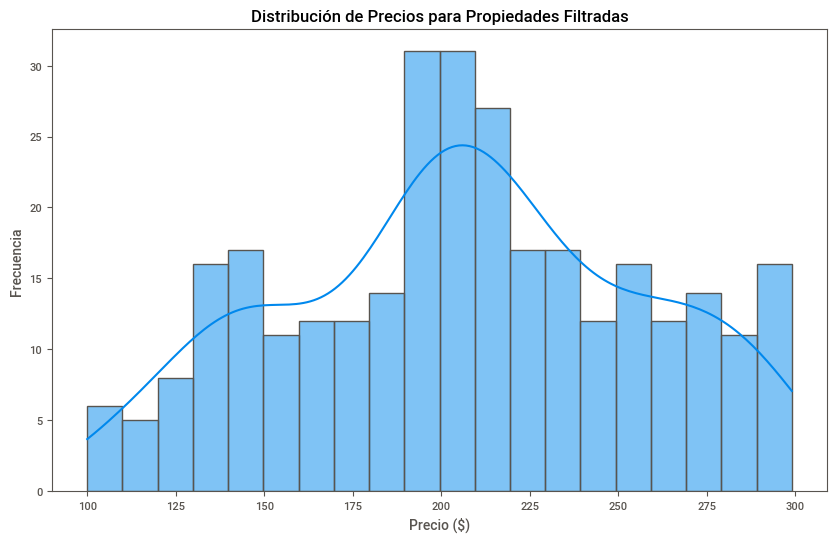

In [87]:
# Visualizar la distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered_ratings['price'], bins=20, kde=True)
plt.title('Distribución de Precios para Propiedades Filtradas')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')
plt.show()

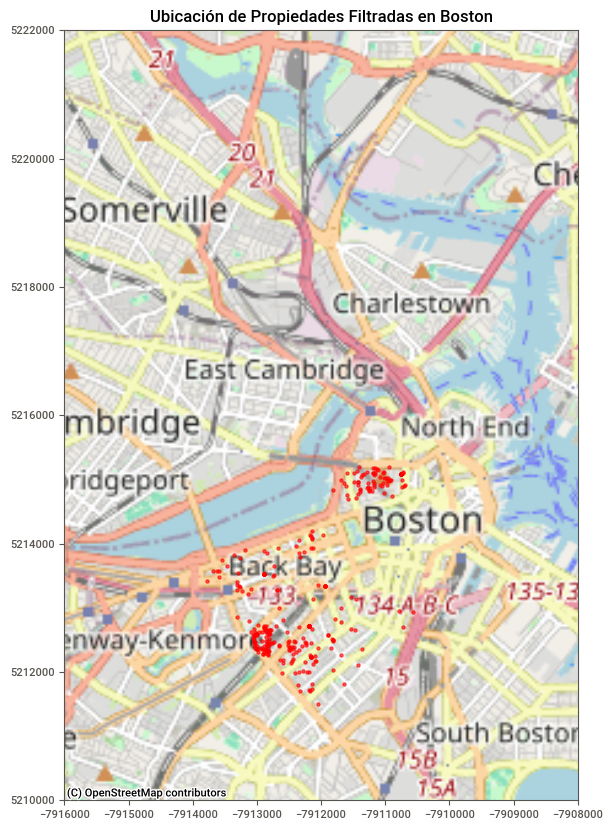

In [92]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Crear un GeoDataFrame para las propiedades filtradas
gdf_filtered = gpd.GeoDataFrame(
    data_filtered_ratings, 
    geometry=gpd.points_from_xy(data_filtered_ratings.longitude, data_filtered_ratings.latitude)
)

# Definir el sistema de referencia espacial adecuado (CRS)
gdf_filtered = gdf_filtered.set_crs(epsg=4326)  # WGS84 (lat/lon)

# Reproyectar a Web Mercator para usarlo con contextily
gdf_filtered = gdf_filtered.to_crs(epsg=3857)

# Crear la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos de las propiedades filtradas
gdf_filtered.plot(ax=ax, markersize=5, color='red', alpha=0.6)

# Definir los límites geográficos (bounding box) para Boston
# Esto se ajusta aproximadamente a la ciudad de Boston en coordenadas EPSG:3857 (Web Mercator)
ax.set_xlim([-7916000, -7908000])  # Ajustar los límites en longitud
ax.set_ylim([5210000, 5222000])    # Ajustar los límites en latitud

# Añadir el mapa base de OpenStreetMap centrado en el área de Boston
ctx.add_basemap(ax, zoom=12, source=ctx.providers.OpenStreetMap.Mapnik)

# Añadir el título y mostrar el gráfico
plt.title('Ubicación de Propiedades Filtradas en Boston')
plt.show()